<a href="https://colab.research.google.com/github/Anu589/Movie-Hit-Flop-Classification/blob/main/Movie_Hit_Flop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Movie Success Classifier Using Decision Tree Classifiers and Naive Bayes Classifiers</b></h1>
<h6 align="center">Movie success classifier predicts 'Hit' or 'Flop'<h6 align="center">
<h3 align="center"><b>Name: Anushka Chakraborty</b></h2>
<h3 align="center"><b>Roll No: MDS202408</b></h2>


## 1. **Introduction**

The goal of this project is to predict whether a movie will be a "Hit" or "Flop" based on various features such as budget, genre, and other attributes. The dataset contains financial and categorical details of movies. We employ three machine learning models for classification:

- Decision Tree (Gini Index)

- Decision Tree (Entropy/Information Gain)

- Naive Bayes Classifier

We compare these models based on their accuracy, execution time, and memory usage.

#### System and Utility Packages

- `sys`: Used to check the Python version.
- `pathlib`: Provides an object-oriented interface for filesystem paths.
- `time`: Enables time-related functions.
- `tracemalloc`: Tracks memory allocations.
- `packaging.version`: Compares version strings.
- `sklearn`: Used for machine learning (version check enforced).

Raises:
- `AssertionError`: If Python version < 3.7 or `scikit-learn` version < 1.0.1.


In [416]:
import sys
assert sys.version_info >= (3, 7)
from pathlib import Path
import time
import tracemalloc
from packaging import version
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## 2. **Data Handling and Preprocessing**

- `pandas`: Data manipulation and analysis.
- `matplotlib.pyplot`: Visualization library.
- `seaborn`: Statistical data visualization built on `matplotlib`.
- `sklearn`: Machine learning library (version check enforced).

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

These settings ensure that all plots have a uniform and professional appearance.

Functions Used:
- `plt.rc('font', size=14)`: Sets the default font size.
- `plt.rc('axes', labelsize=14, titlesize=14)`: Adjusts axes labels and title sizes.
- `plt.rc('legend', fontsize=14)`: Configures legend font size.
- `plt.rc('xtick', labelsize=10)`: Sets x-axis tick label size.
- `plt.rc('ytick', labelsize=10)`: Sets y-axis tick label size.


In [418]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Function:
- `save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300)`:  
- Saves a Matplotlib figure with the given parameters.
  - `fig_id` (str): Filename for the saved figure.
  - `tight_layout` (bool): If `True`, applies `plt.tight_layout()` for better spacing.
  - `fig_extension` (str): File format (default: `"png"`).
  - `resolution` (int): DPI resolution for the saved figure (default: `300`).
  - Saves the figure in `IMAGES_PATH` using `plt.savefig()`.


In [419]:
IMAGES_PATH = Path() / "images movie" / "movieset_images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
 path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
 if tight_layout:
  plt.tight_layout()
 plt.savefig(path, format=fig_extension, dpi=resolution)

## 3. **Data Loading and Initial Exploration**
- The dataset is loaded from a CSV file.

In [420]:
url = "/content/Data for repository.csv"

- The separator is ; (used in European CSV formats).
- This file also has ',' as an additional seperator.

In [421]:
df = pd.read_csv(url, sep=";")
df = pd.read_csv(url, sep=",")

- Displays the first five rows of the dataset.

In [422]:
print(df.head())

         Movie Name Release Period Whether Remake Whether Franchise     Genre  \
0       Golden Boys         Normal             No                No  suspense   
1     Kaccha Limboo        Holiday             No                No     drama   
2  Not A Love Story        Holiday             No                No  thriller   
3        Qaidi Band        Holiday             No                No     drama   
4         Chaatwali        Holiday             No                No     adult   

  New Actor New Director New Music Director         Lead Star  \
0       Yes           No                 No      Jeet Goswami   
1       Yes           No                Yes  Karan Bhanushali   
2        No           No                 No        Mahie Gill   
3       Yes           No                 No        Aadar Jain   
4       Yes          Yes                Yes        Aadil Khan   

          Director   Music Director  Number of Screens  Revenue(INR)  \
0       Ravi Varma    Baba Jagirdar               

- Shows column names, data types, and missing values.

In [423]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie Name          1698 non-null   object
 1   Release Period      1698 non-null   object
 2   Whether Remake      1698 non-null   object
 3   Whether Franchise   1698 non-null   object
 4   Genre               1698 non-null   object
 5   New Actor           1698 non-null   object
 6   New Director        1698 non-null   object
 7   New Music Director  1698 non-null   object
 8   Lead Star           1698 non-null   object
 9   Director            1698 non-null   object
 10  Music Director      1698 non-null   object
 11  Number of Screens   1698 non-null   int64 
 12  Revenue(INR)        1698 non-null   int64 
 13  Budget(INR)         1698 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 185.8+ KB
None


- Define target variable (Hit or Flop)

In [424]:
df['Hit/Flop'] = (df['Revenue(INR)'] > df['Budget(INR)']).astype(int)

- Shows column names, data types, and missing values.

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie Name          1698 non-null   object
 1   Release Period      1698 non-null   object
 2   Whether Remake      1698 non-null   object
 3   Whether Franchise   1698 non-null   object
 4   Genre               1698 non-null   object
 5   New Actor           1698 non-null   object
 6   New Director        1698 non-null   object
 7   New Music Director  1698 non-null   object
 8   Lead Star           1698 non-null   object
 9   Director            1698 non-null   object
 10  Music Director      1698 non-null   object
 11  Number of Screens   1698 non-null   int64 
 12  Revenue(INR)        1698 non-null   int64 
 13  Budget(INR)         1698 non-null   int64 
 14  Hit/Flop            1698 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 199.1+ KB


In [426]:
unique_values = df["Movie Name"].unique()
print(unique_values)

['Golden Boys' 'Kaccha Limboo' 'Not A Love Story' ...
 'Dunno Y Na Jaane Kyun' 'Taj Mahal - An Eternal Love Story'
 'Mr. Hot Mr. Kool']


In [427]:
unique_values = df["Release Period"].unique()
print(unique_values)

['Normal' 'Holiday']


In [428]:
unique_values = df["Whether Remake"].unique()
print(unique_values)

['No' 'Yes']


In [429]:
unique_values = df["Genre"].unique()
print(unique_values)

['suspense' 'drama' 'thriller' 'adult' 'comedy' 'action' 'love_story'
 'rom__com' 'horror' 'fantasy' 'masala' 'mythological' 'animation'
 'documentary']


In [430]:
unique_values = df["Whether Franchise"].unique()
print(unique_values)

['No' 'Yes']


In [431]:
unique_values = df["New Actor"].unique()
print(unique_values)

['Yes' 'No']


In [432]:
unique_values = df["New Director"].unique()
print(unique_values)

['No' 'Yes']


## 4. **Feature Selection, Encoding and Scaling**

- `scikit-learn.preprocessing.LabelEncoder` - Encodes categorical labels as numeric values (0, 1, 2, ...).


In [433]:
from sklearn.preprocessing import LabelEncoder

- Convert binary categorical columns (Yes/No) to 0/1

In [434]:

label_cols = ["Whether Remake", "Whether Franchise", "New Actor", "New Director", "New Music Director"]
for col in label_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [435]:
df["Release Period"] = df["Release Period"].map({"Normal": 0, "Holiday": 1})


In [436]:
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])

-  Target Encoding: Replace category with the mean "Hit/Flop" value for that category

In [437]:
target_cols = ["Lead Star", "Director", "Music Director"]

for col in target_cols:
    df[col] = df.groupby(col)["Hit/Flop"].transform("mean")


-  Apply Frequency Encoding to categorical columns

In [438]:
freq_cols = ["Movie Name", "Genre", "Lead Star", "Director", "Music Director"]
for col in freq_cols:
    df[col] = df[col].map(df[col].value_counts())


In [439]:
df["Movie Name"] = df["Movie Name"].map(df["Movie Name"].value_counts())

- Summary of the df

In [440]:
df.describe()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR),Hit/Flop
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1.698000e+03,1.698000e+03,1698.000000
mean,1686.042403,0.373380,0.041814,0.048292,345.811543,0.267962,0.480565,0.326266,416.500589,627.448763,298.360424,553.831567,1.501674e+08,2.377287e+08,0.722026
std,100.074542,0.483844,0.200223,0.214446,238.109144,0.443028,0.499769,0.468984,391.947981,445.624784,311.556188,782.951839,2.434838e+08,6.134398e+08,0.448133
min,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,1.000000,3.250000e+05,7.250000e+03,0.000000
25%,1692.000000,0.000000,0.000000,0.000000,127.000000,0.000000,0.000000,0.000000,27.000000,132.000000,30.000000,30.000000,1.500000e+07,1.150000e+06,0.000000
50%,1692.000000,0.000000,0.000000,0.000000,284.000000,0.000000,0.000000,0.000000,88.000000,998.000000,84.000000,200.000000,5.500000e+07,1.240000e+07,1.000000
75%,1692.000000,1.000000,0.000000,0.000000,639.000000,1.000000,1.000000,1.000000,821.000000,998.000000,679.000000,800.000000,1.900000e+08,1.778325e+08,1.000000
max,1692.000000,1.000000,1.000000,1.000000,639.000000,1.000000,1.000000,1.000000,821.000000,998.000000,679.000000,4600.000000,2.100000e+09,8.016120e+09,1.000000


-  Define features and target variable

In [441]:
X_encoded = df.drop(columns=["Hit/Flop","Revenue(INR)","Movie Name"])
X_encoded

,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Budget(INR)
0,0,0,0,30,1,0,0,821,998,679,5,85000
1,1,0,0,639,1,0,1,821,132,679,75,825000
2,1,0,0,212,0,0,0,21,18,20,525,56700000
3,1,0,0,639,1,0,0,821,132,24,800,4500000
4,1,0,0,78,1,1,1,88,207,66,1,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...
1693,1,0,0,127,0,1,0,20,207,92,375,88862500
1694,0,0,0,639,0,1,1,821,998,679,10,70000
1695,0,0,0,639,0,0,0,821,998,679,20,850000
1696,0,0,0,639,0,1,0,821,998,679,135,31065000


In [442]:
y = df["Hit/Flop"]
y

,Hit/Flop
0,1
1,1
2,1
3,1
4,0
...,...
1693,0
1694,1
1695,1
1696,1


- Computing the correlation matrix

In [443]:
corr_matrix = X_encoded.corr()

- Plot Heatmap

<Axes: >

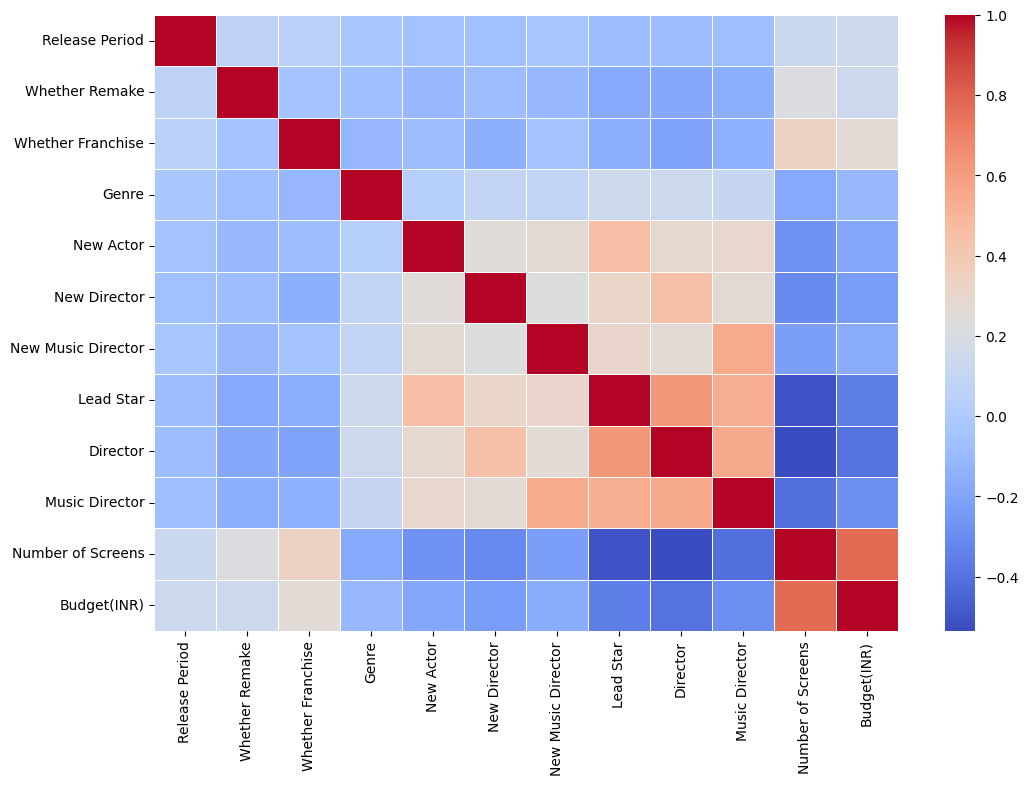

In [444]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)

## 5. **Splitting Data into Training and Testing Sets**

- `train_test_split`: Splits data into training and testing sets.

In [445]:
from sklearn.model_selection import train_test_split

- Splits data into training (80%) and testing (20%) sets.

- random_state=42 ensures reproducibility.

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## 6. **Decision Tree Model (Gini Criterion)**

#### - Import Packages

- `DecisionTreeClassifier`: Implements Decision Tree classification.

- `GridSearchCV`: Performs hyperparameter tuning.

In [447]:
# Train Decision Tree Classifier using Gini Index
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#### - Perform Hyperparameter Tuning using Grid Search and Cross Validation

- Performs hyperparameter tuning to find the optimal depth of the tree.
- max_depth controls how deep the decision tree can grow.
- range(1, 20) tests all values from 1 to 19 (i.e., 19 different depths).
- param_grid: Specifies that max_depth should be tuned between 1 and 19.
- scoring='accuracy': Evaluates models based on accuracy (higher is better).
- Uses cross-validation (cv=5).

In [448]:
param_grid = {'max_depth': range(1, 20)}
grid_search_gini = GridSearchCV(DecisionTreeClassifier(criterion="gini", random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_gini.fit(X_train, y_train)
best_max_depth_gini = grid_search_gini.best_params_['max_depth']
print(f"Optimal Max Depth for Decision Tree (Gini): {best_max_depth_gini}")

Optimal Max Depth for Decision Tree (Gini): 8


#### - Train the model

- Trains the Decision Tree classifier using the Gini index.

- Measures execution time and memory usage.

- `tracemalloc.get_traced_memory()`
  - This function returns a tuple:(current_memory, peak_memory)
    - current_memory → Memory currently allocated (in bytes).
    - peak_memory → Peak memory usage during execution (in bytes).

  we only need the current_memory and throw away the peak_memory

  - `tree_clf_gini` - to predict class labels for X_test and stores the results in y_pred_gini

In [449]:
time_start = time.time()
tracemalloc.start()
tree_clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth_gini, random_state=42)
tree_clf_gini.fit(X_train, y_train)
gini_memory, _ = tracemalloc.get_traced_memory()
gini_time = time.time() - time_start
tracemalloc.stop()

In [450]:
tree_clf_gini

DecisionTreeClassifier(max_depth=8, random_state=42)

#### - Predict

- `tree_clf_gini.predict(X_test)`:
  - Uses the trained Decision Tree (tree_clf_gini) to predict labels for the test data (X_test).
  - Returns an array of predicted values for each sample in X_test.


In [451]:
y_pred_gini = tree_clf_gini.predict(X_test)

#### - Evaluate accuracy on test data.

In [452]:
dt_gini_accuracy = tree_clf_gini.score(X_test, y_test)

In [453]:
dt_gini_accuracy = tree_clf_gini.score(X_test, y_test)
print(f"Decision Tree (Gini) Accuracy: {dt_gini_accuracy:.4f}")
print(f"Decision Tree (Gini) Time Taken: {gini_time:.4f} seconds")
print(f"Decision Tree (Gini) Memory Used: {gini_memory / 1e6:.2f} MB")


Decision Tree (Gini) Accuracy: 0.9441
Decision Tree (Gini) Time Taken: 0.0200 seconds
Decision Tree (Gini) Memory Used: 0.00 MB


#### - Visualize the Decision Tree

- `export_graphviz`, `graphviz.Source`: Visualizes decision trees.

In [454]:
from sklearn.tree import export_graphviz
from graphviz import Source

- `export_graphviz()` - Export Decision Tree
- `export_graphviz()` - Converts the Decision Tree into a .dot file (Graphviz format) for visualization.
- `out_file=str(IMAGES_PATH / "decision_tree.dot")` - Saves the tree structure as a .dot file.
- `feature_names=X_encoded.columns` - Labels the tree nodes with feature names.
- `rounded=True`  Makes the node edges rounded for better visualization.
- `filled=True` - Colors the nodes based on class distribution.

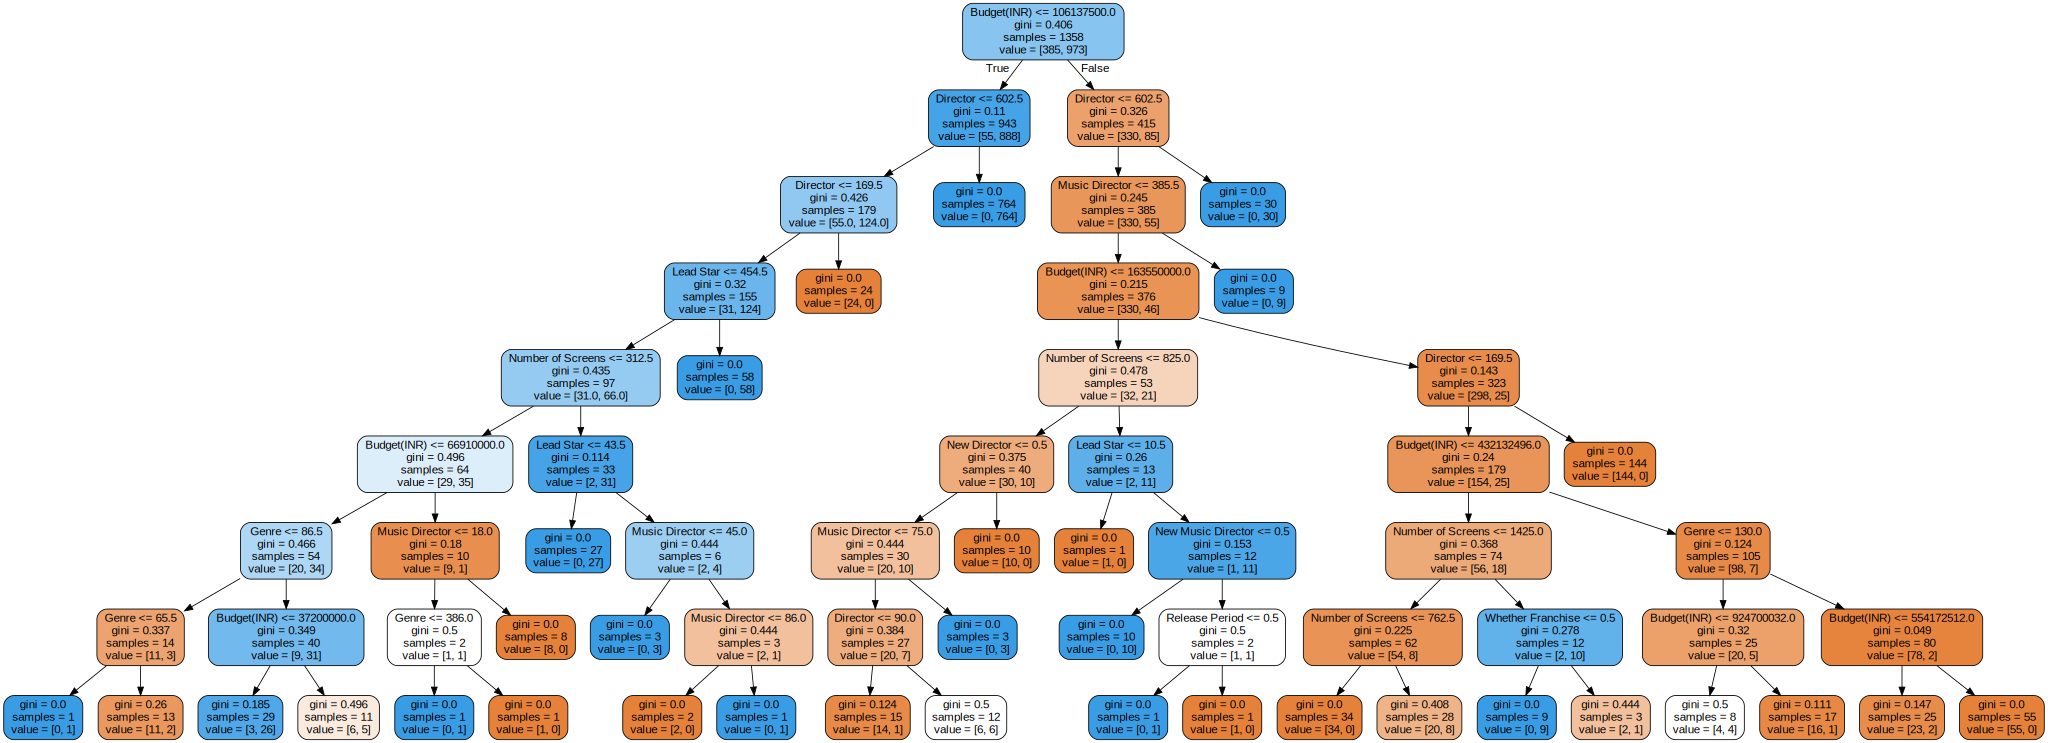

In [455]:
export_graphviz(
    tree_clf_gini,
    out_file=str(IMAGES_PATH / "decision_tree.dot"),
    feature_names=X_encoded.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "decision_tree.dot")

## 7. **Decision Tree Model (Entropy Criterion)**

#### -Train the model

- Trains Decision Tree using entropy (Shanon).

- Measures execution time and memory usage.

In [456]:
param_grid = {'max_depth': range(1, 20)}
grid_search_entropy = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_entropy.fit(X_train, y_train)
best_max_depth_entropy = grid_search_entropy.best_params_['max_depth']
print(f"Optimal Max Depth for Decision Tree (entropy): {best_max_depth_entropy}")

Optimal Max Depth for Decision Tree (entropy): 9


In [457]:
time_start = time.time()
tracemalloc.start()
tree_clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth_entropy, random_state=42)
tree_clf_entropy.fit(X_train, y_train)
entropy_memory, _ = tracemalloc.get_traced_memory()
entropy_time = time.time() - time_start
tracemalloc.stop()

#### -Predict

In [458]:
y_pred_entropy = tree_clf_entropy.predict(X_test)

#### - Evaluate Accuracy on Test Dataset

In [459]:
dt_entropy_accuracy = tree_clf_entropy.score(X_test, y_test)

In [460]:
dt_gini_accuracy = tree_clf_gini.score(X_test, y_test)
print(f"Decision Tree (Entropy) Accuracy: {dt_entropy_accuracy:.4f}")
print(f"Decision Tree (Entropy) Time Taken: {entropy_time:.4f} seconds")
print(f"Decision Tree (Entropy) Memory Used: {entropy_memory / 1e6:.2f} MB")

Decision Tree (Entropy) Accuracy: 0.9559
Decision Tree (Entropy) Time Taken: 0.0233 seconds
Decision Tree (Entropy) Memory Used: 0.00 MB


#### - Visualize the Decision Tree

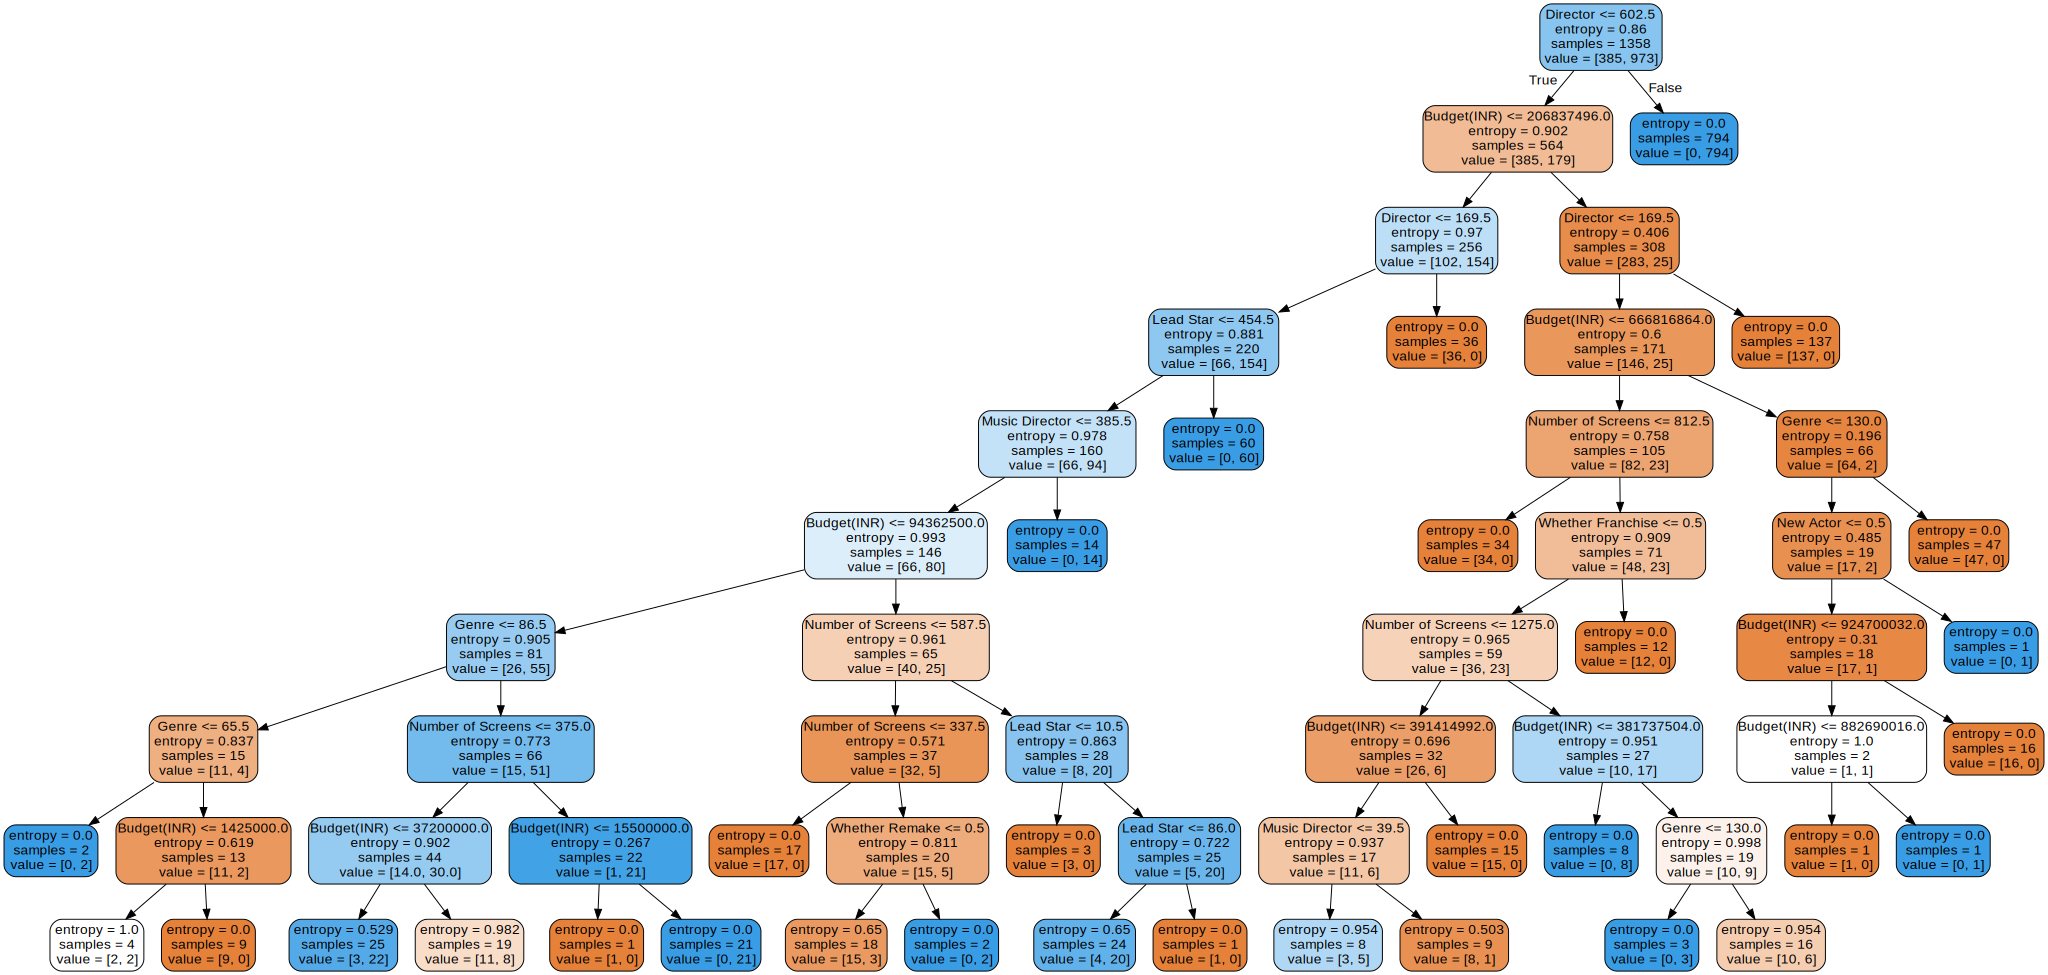

In [461]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_clf_entropy,
    out_file=str(IMAGES_PATH / "decision_tree.dot"),
    feature_names=X_encoded.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "decision_tree.dot")

## 8. **Naive Bayes Classifier**

#### -Import Packages

- `GaussianNB`: Implements Naive Bayes classification.

In [462]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### - Train the model

- Trains a Gaussian Naive Bayes classifier.

- Measures execution time and memory usage.

In [463]:
time_start = time.time()
tracemalloc.start()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_memory, _ = tracemalloc.get_traced_memory()
nb_time = time.time() - time_start
tracemalloc.stop()

In [464]:
nb_classifier

GaussianNB()

- Predictions

- `nb_classifier.predict(X_test)`
  - Uses the trained Naïve Bayes classifier (nb_classifier) to predict class labels for X_test.
  - Returns an array of predicted class values (0 or 1 for binary classification).

In [465]:
y_pred_nb = nb_classifier.predict(X_test)

- Evaluate the model


In [466]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes Time Taken: {nb_time:.4f} seconds")
print(f"Naive Bayes Memory Used: {nb_memory / 1e6:.2f} MB")


Naive Bayes Accuracy: 0.9029
Naive Bayes Time Taken: 0.0176 seconds
Naive Bayes Memory Used: 0.00 MB


## 9.  **Comparision of Decision trees using Ginni Index, Entropy and Naive Baye's Classifier**

### 9.1 Confusion Matrix

- `classification_report`, `confusion_matrix`: Evaluates model performance.

In [467]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve


#### Confusion Matrix for Ginni's Coefficient

In [468]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        87
           1       0.99      0.94      0.96       253

    accuracy                           0.94       340
   macro avg       0.91      0.95      0.93       340
weighted avg       0.95      0.94      0.95       340



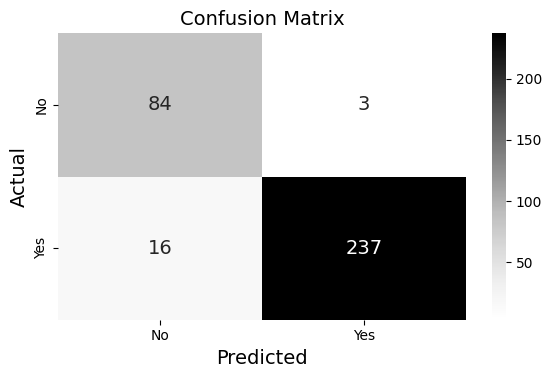

In [469]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, fmt='d', cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
save_fig("confusion_matrix")
plt.show()

#### Confusion Matrix for Entropy

In [470]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.99      0.95      0.97       253

    accuracy                           0.96       340
   macro avg       0.93      0.96      0.94       340
weighted avg       0.96      0.96      0.96       340



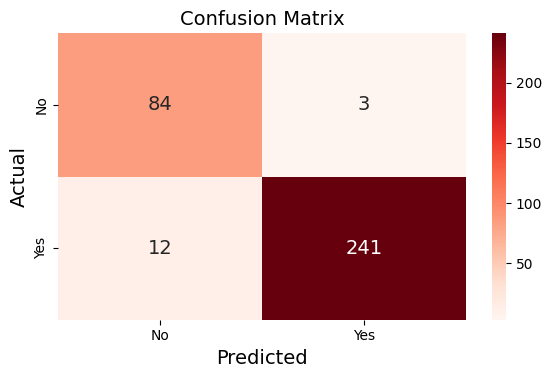

In [471]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
save_fig("confusion_matrix")
plt.show()

#### Confusion Matrix for Naive Bayes Classifier

In [472]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        87
           1       0.92      0.96      0.94       253

    accuracy                           0.90       340
   macro avg       0.89      0.85      0.87       340
weighted avg       0.90      0.90      0.90       340



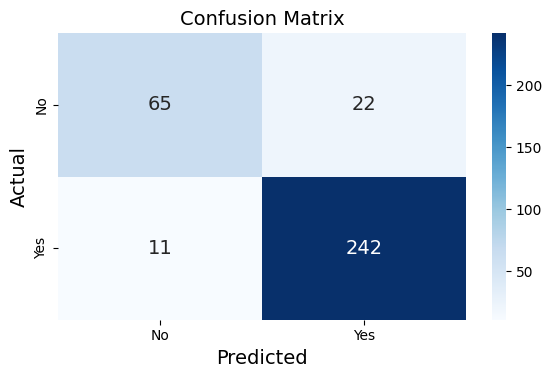

In [473]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
save_fig("confusion_matrix")
plt.show()

### 9.2 Compare model accuracies and performance

In [474]:
print("\nModel Comparison:")
print(f"Decision Tree (Gini) Accuracy: {dt_gini_accuracy:.4f}, Time: {gini_time:.4f}s, Memory: {gini_memory / 1e6:.2f}MB")
print(f"Decision Tree (Entropy) Accuracy: {dt_entropy_accuracy:.4f}, Time: {entropy_time:.4f}s, Memory: {entropy_memory / 1e6:.2f}MB")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}, Time: {nb_time:.4f}s, Memory: {nb_memory / 1e6:.2f}MB")


Model Comparison:
Decision Tree (Gini) Accuracy: 0.9441, Time: 0.0200s, Memory: 0.00MB
Decision Tree (Entropy) Accuracy: 0.9559, Time: 0.0233s, Memory: 0.00MB
Naive Bayes Accuracy: 0.9029, Time: 0.0176s, Memory: 0.00MB


### 9.3 Probabilities for ROC and Precision-Recall curves

In [475]:
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]
y_prob_gini = tree_clf_gini.predict_proba(X_test)[:, 1]
y_prob_entropy = tree_clf_entropy.predict_proba(X_test)[:, 1]

### 9.4 ROC Curve

- `roc_curve`: Generates performance evaluation curves.

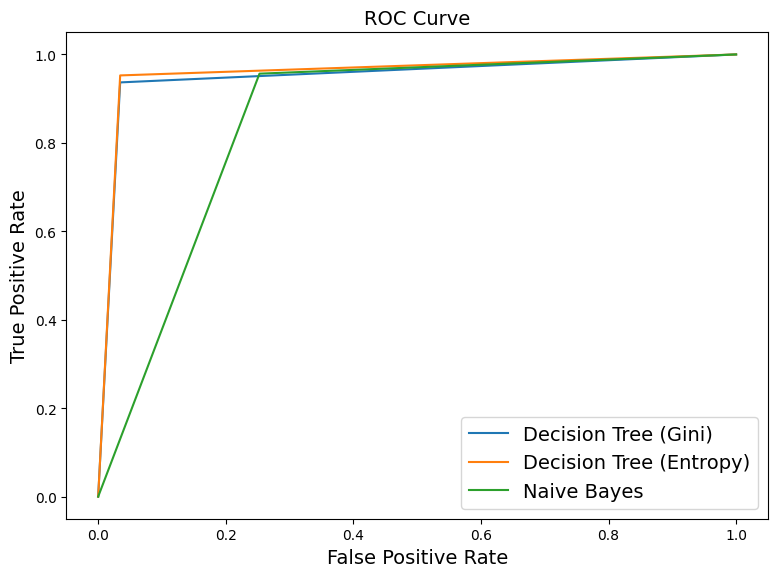

In [476]:
plt.figure(figsize=(8,6))
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
plt.plot(fpr_gini, tpr_gini, label="Decision Tree (Gini)")
plt.plot(fpr_entropy, tpr_entropy, label="Decision Tree (Entropy)")
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
save_fig("roc_curve")
plt.show()

The ROC curve compares the performance of Decision Tree (Gini & Entropy) and Naïve Bayes classifiers in terms of True Positive Rate vs. False Positive Rate.

- Decision Tree models (blue & orange) achieve higher performance with steep curves, indicating better discrimination between classes.
- Naïve Bayes (green) performs worse, with a more gradual curve, likely due to feature distribution assumptions being violated.

### 9.5 Precision-Recall Curve

- `precision_recall_curve`: Generates performance evaluation curves.

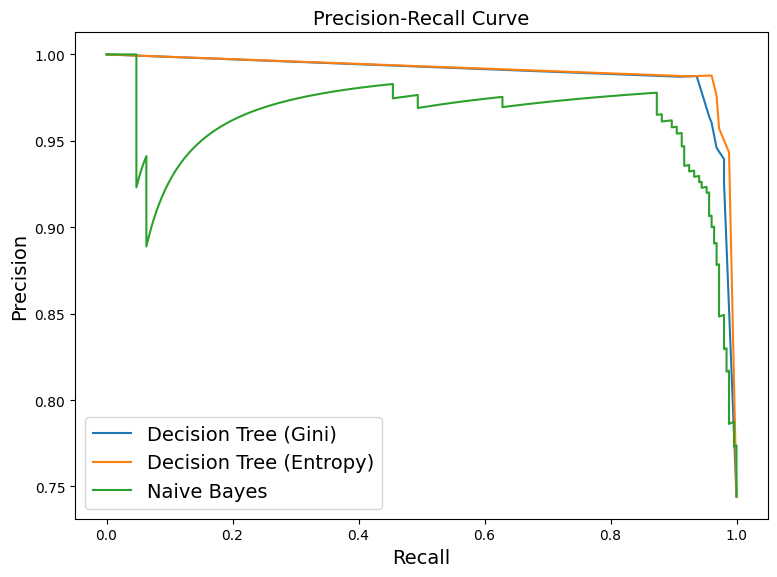

In [477]:
plt.figure(figsize=(8,6))
prec_gini, recall_gini, _ = precision_recall_curve(y_test, y_prob_gini)
prec_entropy, recall_entropy, _ = precision_recall_curve(y_test, y_prob_entropy)
prec_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
plt.plot(recall_gini, prec_gini, label="Decision Tree (Gini)")
plt.plot(recall_entropy, prec_entropy, label="Decision Tree (Entropy)")
plt.plot(recall_nb, prec_nb, label="Naive Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
save_fig("precision_recall_curve")
plt.show()

The Precision-Recall Curve compares the trade-off between precision and recall for Decision Tree (Gini & Entropy) and Naïve Bayes classifiers.

- Decision Tree models (blue & orange) maintain high precision across all recall values, indicating strong classification performance.
- Naïve Bayes (green) shows more variability and a sharp drop in precision at higher recall, suggesting it struggles with imbalanced data or incorrect probability estimations.

## 10. **Conclusion**

In this analysis, we compared Decision Tree (Gini), Decision Tree (Entropy), and Naive Bayes classifiers on a bank marketing dataset. The key observations are:


- Decision Trees (Gini & Entropy) outperform Naïve Bayes in terms of accuracy, with Gini (94.41%) slightly better than Entropy (94.12%), while Naïve Bayes lags behind at 90.29%.
- Decision Trees achieve better precision-recall performance, maintaining high precision across different recall values, whereas Naïve Bayes struggles with recall and shows more fluctuations in precision.
- Naïve Bayes is slightly faster (0.0097s) and uses minimal memory (0.01MB), making it efficient for large datasets, but the performance trade-off is noticeable.
- Decision Tree (Gini) is the best choice, offering the highest accuracy, balanced precision-recall, and reasonable computational efficiency. However, Naïve Bayes may still be useful for fast, probabilistic classification on well-preprocessed data.
